In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import math

UNCLASSIFIED = False
NOISE = -1

# Task I - Density‐based Clustering

In [2]:
def _dist(p,q):
    # compute and return the euclidean distance
    # put your code here
    # distance computation
    distance = ((p[0]-q[0])**2+(p[1]-q[1])**2)**0.5
    return distance

In [3]:
def _eps_neighborhood(p,q,eps):
    # check if the distance between p and q is below eps
    # return True or False
    # put your code here
    # check distance
    if _dist(p,q) <= eps: return True
    else: return False

In [4]:
def _region_query(m, point_id, eps):
    n_points = m.shape[1]
    seeds = []
    # find and return all points that belong to eps-neighborhood of point_id
    # put your code here
    # loop to find all points in neighborhood and append to seeds
    for i in range(n_points):
        if _eps_neighborhood((m[0,point_id],m[1,point_id]),(m[0,i],m[1,i]),eps): seeds.append(i)
    return seeds

In [5]:
def _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points):
    # expand the cluster of cluster_id from point_id
    # identify all points belonging to cluster_id
    # update the clustering results in "classification" by assigning cluster_id to each point
    # return True if point_id is a core, False if point_id is not a core
    # write your code below
    neighbors = _region_query(m, point_id, eps)
    # check if core and apdate classification
    if len(neighbors) < min_points:
        # if not core and no cluster id, label as noise and return false
        for i in neighbors:
            if classifications[i] == False:
                classifications[i] = NOISE
        return False
    else:
        # if core and id is False or noise, label cluster id and run function again for all points in neighborhood
        # return true
        for i in neighbors:
            if classifications[i] == False or classifications[i] == NOISE:
                classifications[i] = cluster_id
                _expand_cluster(m, classifications, i, cluster_id, eps, min_points)
        return True

In [6]:
def dbscan(m, eps, min_points):
    """Implementation of DBSCAN
    You can refer to wikipedia for detailed algorithm: https://en.wikipedia.org/wiki/DBSCAN
    Use Euclidean Distance as the measure
    
    Inputs:
    m - A matrix whose columns are feature vectors
    eps - Maximum distance two points can be to be regionally related
    min_points - The minimum number of points to make a cluster
    
    Outputs:
    An array with either a cluster id number or dbscan.NOISE (None) for each column vector in m
    """
    cluster_id = 1
    n_points = m.shape[1]
    classifications = [UNCLASSIFIED] * n_points
    # the main dbscan algorithm
    # put your code here
    # run function for every point id if point id classification is false
    for point_id in range(n_points):
        if classifications[point_id] == False:
            flag = _expand_cluster(m, classifications, point_id, cluster_id, eps, min_points)
            # cluster id += 1 if point id is core and function is done with expansion
            if flag: cluster_id += 1
            
    return classifications

In [7]:
# test here
dataset_1 = pd.read_csv('blobs.csv')[:80].values
m = np.asmatrix(dataset_1)
m = m.transpose()

In [8]:
eps = 1.6
min_points = 5
a = dbscan(m, eps, min_points)

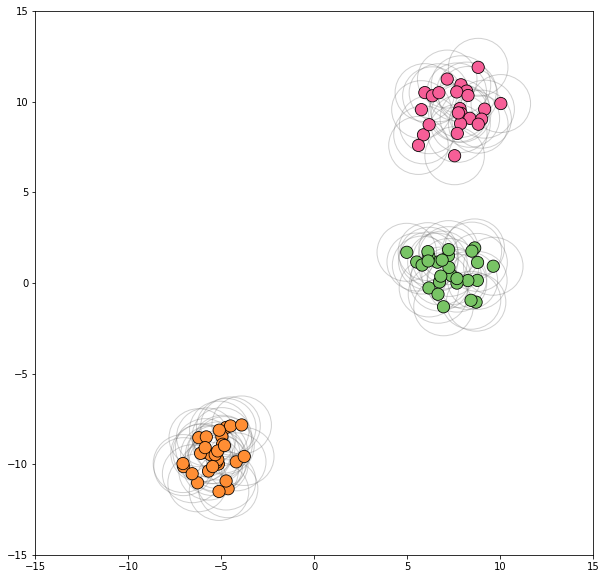

In [9]:
%matplotlib inline
import dbscan_lab_helper as helper

result = np.asarray(a)
helper.plot_clustered_dataset(dataset_1, result, neighborhood=True, epsilon=eps)

In [10]:
dataset_2 = pd.read_csv('varied.csv')[:300].values
m = np.asmatrix(dataset_2)
m = m.transpose()

In [11]:
eps = 1.3
min_points = 5
a = dbscan(m, eps, min_points)

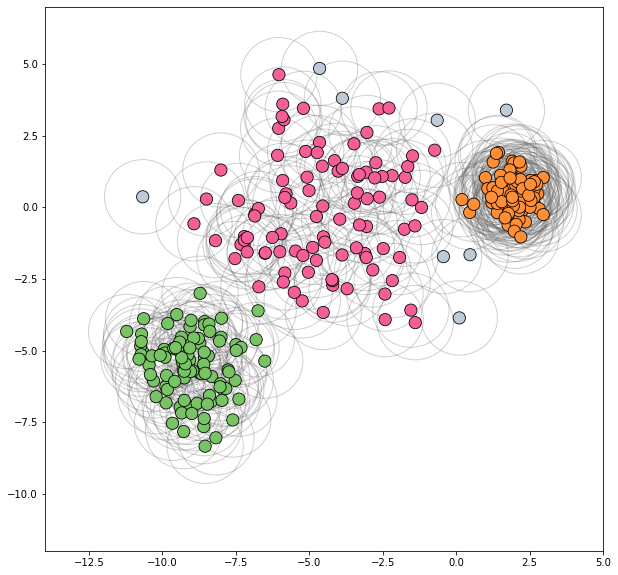

In [12]:
result = np.asarray(a)
helper.plot_clustered_dataset(dataset_2, result, xlim=(-14, 5), ylim=(-12, 7), neighborhood=True, epsilon=eps)


# Task II - K Nearest Neighbor

In [13]:
random.seed(777)
scat_X = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
scat_Y = np.array(list(random.randint(-1000, 1000) for _ in range(1000)))
# You might need to do some reshape and stack here...
# stack data
scat_X_Y_raw = np.stack((scat_X,scat_Y))

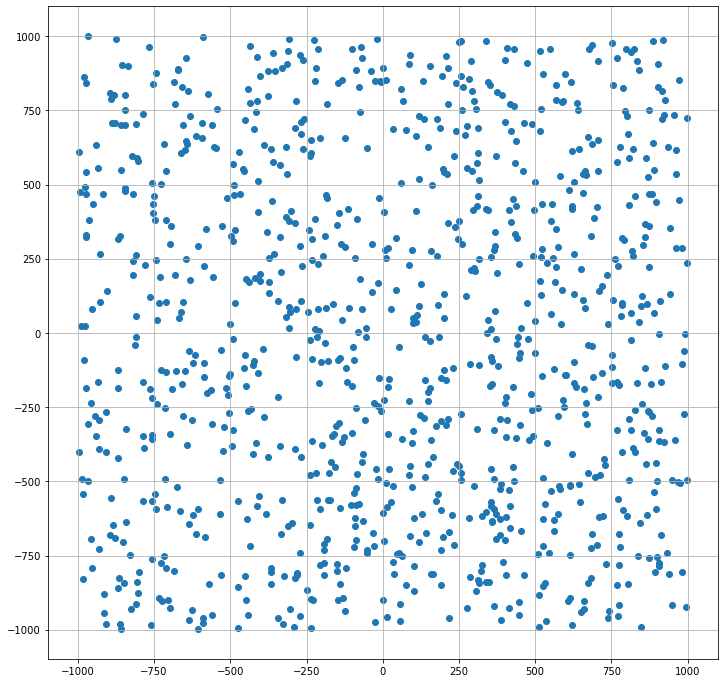

In [14]:
%matplotlib inline
plt.figure(figsize = (12, 12))
# plot scatterplot
plt.scatter(scat_X,scat_Y)    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!
# add grid
plt.grid()

In [15]:
def radius(ndarray, r):
    #initialize mask
    boolean_mask = [False]*1000
    # Check if a point is in the given radius
    # if point is in given radius, mask = true
    for i in range(1000):
        if (ndarray[0][i]**2+ndarray[1][i]**2)**0.5 <= 1000:
            boolean_mask[i] = True
    # return masked ndarray 
    return ndarray[:,boolean_mask]

In [16]:
# find all points of data in given radius 1000
scat_X_Y = radius(scat_X_Y_raw, 1000)

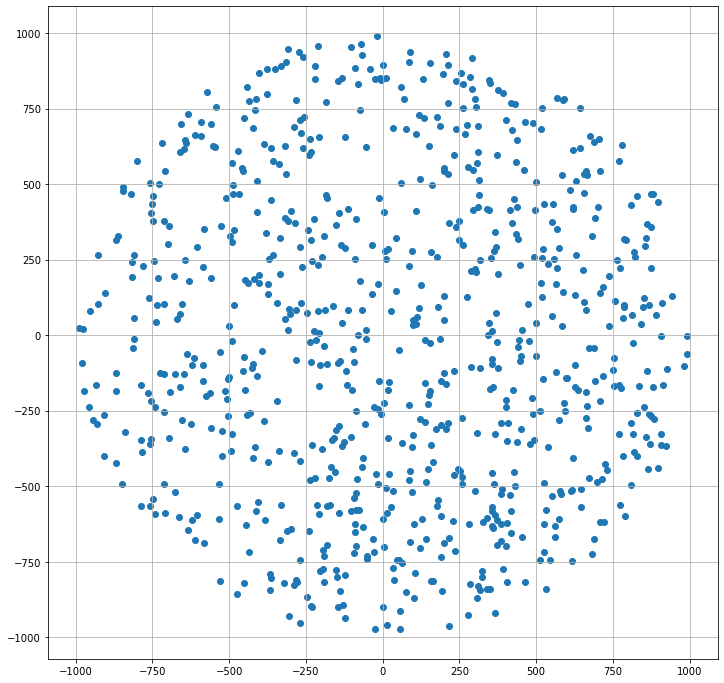

In [17]:
%matplotlib inline
plt.figure(figsize = (12, 12))
#plot scatterplot
plt.scatter(scat_X_Y[0],scat_X_Y[1])    # Put the "X" and "Y" in the scatter plot function...
# How to make the ＂格線＂ of X and Y the same length...? Google might help!
# add grid
plt.grid()

In [18]:
# Calculates the distance between each point...
# initialization
dist_sq = []
# use loop to calculate each points distance between each other in tmp and append to dist_sq
for p in range(len(scat_X_Y[0])):
    tmp = []
    for q in range(len(scat_X_Y[0])):
        tmp.append((scat_X_Y[0][p]-scat_X_Y[0][q])**2 + (scat_X_Y[1][p]-scat_X_Y[1][q])**2)
    dist_sq.append(tmp)
dist_sq = np.asmatrix(dist_sq)

In [19]:
print(dist_sq)

[[      0  210825  282098 ... 3074906 3018280 3020445]
 [ 210825       0   30977 ... 2217113 2390869 1796418]
 [ 282098   30977       0 ... 1739088 1878130 1471157]
 ...
 [3074906 2217113 1739088 ...       0   90634  462437]
 [3018280 2390869 1878130 ...   90634       0  936505]
 [3020445 1796418 1471157 ...  462437  936505       0]]


In [20]:
# Find the nearest neighbor of each point...
# sort dist_sq by index according to distance
nearest = np.argsort(dist_sq)

In [21]:
print(nearest)

[[  0  55  29 ... 599 278 614]
 [  1 639 252 ... 505 609 253]
 [  2 676 261 ...  31 609 253]
 ...
 [787 738 643 ...  55 740 618]
 [788 373 557 ... 546 134 535]
 [789 295  19 ... 523 194 629]]


In [22]:
def nearest_partition(dist_sq, K):
    # sort dist_sq in nearest
    nearest = np.argsort(dist_sq)
    # initialize result
    result = []
    # use loop to find K nearest and append to result and return result
    for i in range(len(scat_X_Y[0])):
        result.append(nearest[i,0:K+1])
    return result  # Use a numpy method(function) to return the "K Nearest Neighbor"

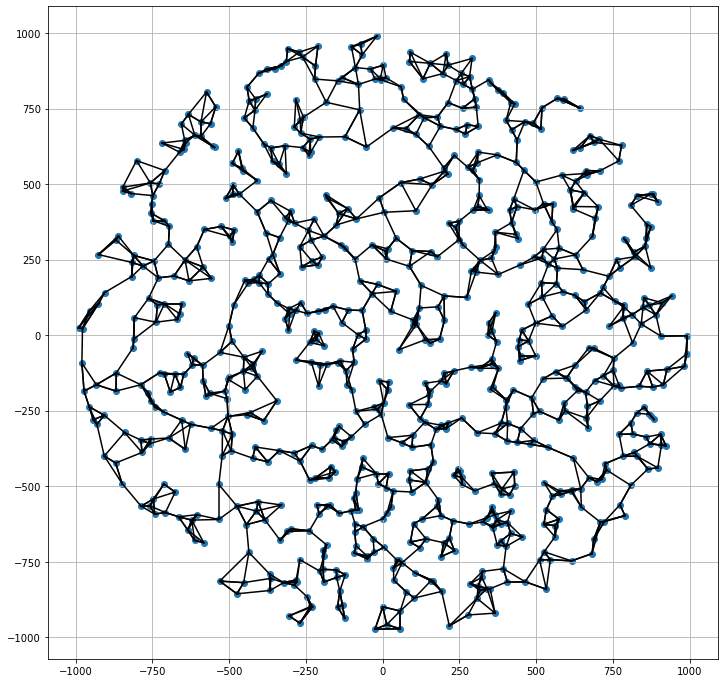

In [23]:
plt.figure(figsize = (12, 12))
# plot scatterplot of data in given radius
plt.scatter(scat_X_Y[0],scat_X_Y[1])    # Put the "X" and "Y" in the scatter plot function...

# draw lines from each point to its three nearest neighbors
K = 3
# You might need loops to generate the plot below...
# find k nearest neighbors with function
knn = nearest_partition(dist_sq, K)
# use loop to plot lines from each point to its k nearest neighbors
for i in knn:
    x = scat_X_Y[0][i][0]
    y = scat_X_Y[1][i][0]
    plt.plot([x[0],x[1]],[y[0],y[1]], color = 'k')
    plt.plot([x[0],x[2]],[y[0],y[2]], color = 'k')
    plt.plot([x[0],x[3]],[y[0],y[3]], color = 'k')
# How to make the ＂格線＂ of X and Y the same length...? Google might help!
# add grid to plot
plt.grid()